# ZEWK - Hands On Datenvisualisierung, Beispiele in Python
Seminar von Letty und Karen  

Dieses Notebook dient als Beispiel für die Implementation einer Datenvisualisierungspipeline in der Sprache Python. Es kann sowohl in Jupyter als auch in Jupyter Lab ausgeführt werden, jedoch können sich einzelne Shortcuts unterscheiden.

## Benutzung von Jupyter (Lab)

Hier ein paar praktische und wichtige Kommandos und Tastenkombinationen die ihr kennen solltet:
Außerhalb einer Zelle:

* ENTER - Zelle editieren  
* strg + ENTER - Zelle ausführen  
* shift + ENTER - Zelle ausführen und zur nächsten gehen  


Innerhalb einer Zelle (Editiermodus der Zelle):

* ESC - Zelle verlassen  
* D, D - Zelle löschen  
* A - leere Zelle oberhalb (above) einfügen  
* B - leere Zelle unterhalb (below) einfügen  


### Setup von hilfreichen Python Packages

In [1]:
%matplotlib inline 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Import der Daten

In [2]:
# Datenimport
my_data = pd.read_excel("owid-covid-data.xlsx") 
my_data['date']= pd.to_datetime(my_data['date']) # Umwandeln von string format zu datetime format

# Nur daten von Deutschland
data_austria = my_data.loc[my_data.location == "Austria"]
data_austria = data_austria.reset_index()

data_sample = my_data.groupby("location").first()
data_sample = data_sample.reset_index()
data_gdp = data_sample[['iso_code', 'continent', 'location', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'life_expectancy']]
data_gdp = data_gdp.reset_index()
data_gdp = data_gdp.loc[data_gdp.continent == "Europe"]

# Bar chart

<AxesSubplot:>

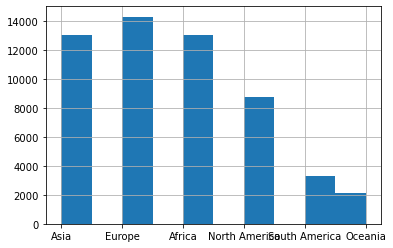

In [3]:
# Create bars
my_data.continent.hist()

# Histogram

<AxesSubplot:>

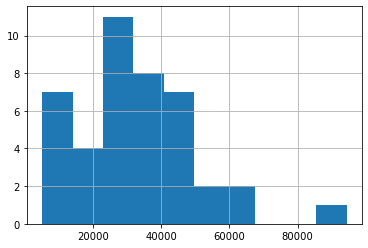

In [4]:
data_gdp.gdp_per_capita.hist()

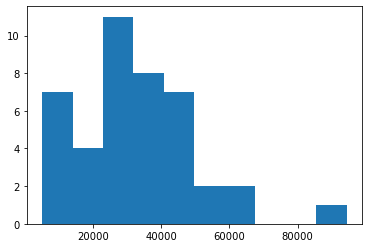

In [5]:
plt.hist(data_gdp.gdp_per_capita)
plt.show()

# Boxplot

<AxesSubplot:xlabel='continent', ylabel='gdp_per_capita'>

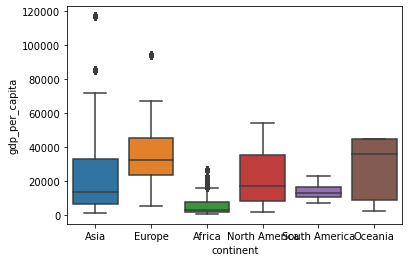

In [6]:
sns.boxplot( x=my_data.continent, y=my_data.gdp_per_capita)

# Scatterplot

<AxesSubplot:xlabel='gdp_per_capita', ylabel='life_expectancy'>

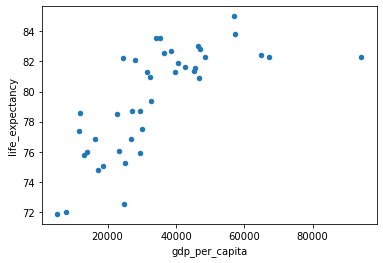

In [7]:
data_gdp.plot.scatter(x='gdp_per_capita', y='life_expectancy')

# Line chart

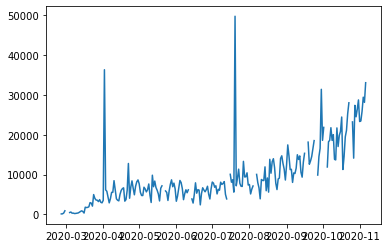

In [8]:
fig, ax = plt.subplots()
ax.plot(data_austria.date, data_austria.new_tests, '-')

# Titel und Achsenbeschriftung

Text(0.5, 1.0, 'Vergleich GDP und Lebenserwartung in Europa')

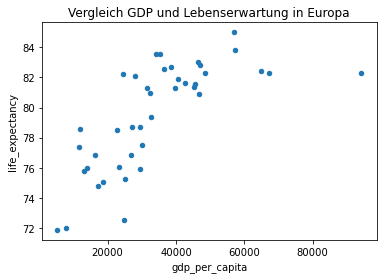

In [9]:
data_gdp.plot.scatter(x='gdp_per_capita', y='life_expectancy')
plt.xlabel("gdp_per_capita")
plt.ylabel("life_expectancy")
plt.title("Vergleich GDP und Lebenserwartung in Europa")

# Farbänderungen

<AxesSubplot:xlabel='gdp_per_capita', ylabel='life_expectancy'>

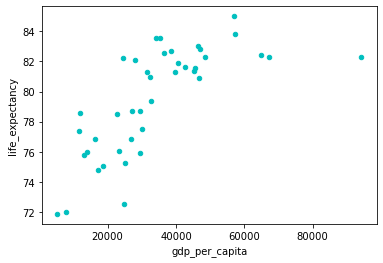

In [10]:
data_gdp.plot.scatter(x='gdp_per_capita', y='life_expectancy', c='c')

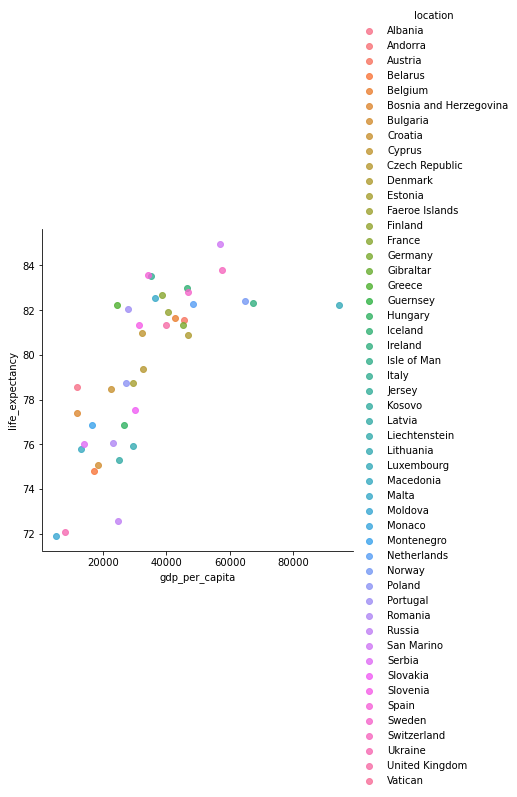

In [11]:
sns.lmplot(data=data_gdp, x="gdp_per_capita", y="life_expectancy", hue="location")

<AxesSubplot:xlabel='continent', ylabel='gdp_per_capita'>

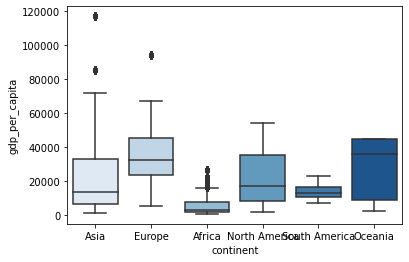

In [12]:
sns.boxplot( x=my_data.continent, y=my_data.gdp_per_capita, palette="Blues")

# Export

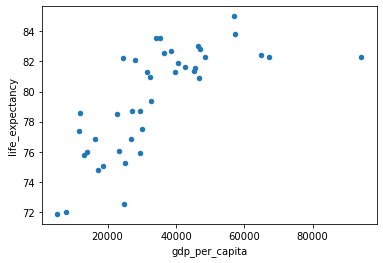

In [13]:
data_gdp.plot.scatter(x='gdp_per_capita', y='life_expectancy')
plt.savefig("Python - scatterplot example.svg")

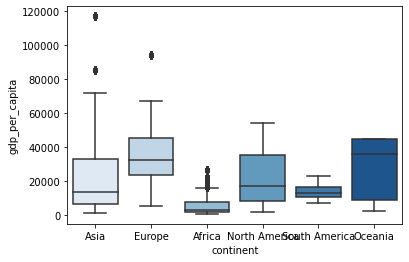

In [14]:
sns.boxplot( x=my_data.continent, y=my_data.gdp_per_capita, palette="Blues")
plt.savefig("Python - Boxplot example.svg")

## References

# Python specific - Seaborn Package
https://seaborn.pydata.org/examples/index.html  
More complex data, easy code